In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = {
    'Wilayah': ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara'],
    'Tingkat_Kemiskinan': [25, 20, 22, 18, 15, 23, 17, 19, 16, 14, 21, 18, 17, 16, 15, 12, 19, 13, 11, 21, 25, 28, 26, 18, 20, 16, 17, 15, 14, 19, 18, 16],
    'Angka_Pengangguran': [8, 7, 6.5, 5, 3.5, 7, 4.5, 5.5, 4, 3, 6, 5, 4.5, 4, 3.5, 2, 5.5, 2.5, 2, 6, 8, 10, 9, 5, 7, 4, 4, 3.5, 3, 5.5, 5, 4],
    'Akses_Pelayanan_Kesehatan': [70, 75, 78, 85, 92, 75, 88, 82, 90, 95, 80, 85, 88, 90, 92, 98, 82, 98, 98, 80, 70, 60, 65, 85, 75, 90, 75, 88, 92, 82, 85, 90],
    'Indeks_Pendidikan': [0.6, 0.65, 0.68, 0.75, 0.82, 0.65, 0.78, 0.72, 0.8, 0.85, 0.7, 0.75, 0.78, 0.8, 0.82, 0.88, 0.72, 0.88, 0.88, 0.7, 0.6, 0.5, 0.55, 0.75, 0.65, 0.8, 0.82, 0.78, 0.82, 0.7, 0.75, 0.8],
    'Cakupan_Sanitasi': [60, 65, 68, 75, 82, 65, 78, 72, 80, 85, 70, 75, 78, 80, 82, 88, 72, 88, 88, 70, 60, 50, 55, 75, 65, 80, 82, 78, 82, 72, 75, 80],
    'Tingkat_Pendidikan': [80, 82, 84, 88, 90, 86, 92, 94, 96, 98, 82, 86, 88, 90, 92, 94, 96, 98, 99, 90, 92, 85, 86, 88, 90, 92, 94, 96, 98, 72, 94, 96],
    'Tingkat_Kesehatan': [75, 80, 82, 86, 88, 84, 90, 92, 94, 96, 80, 84, 86, 88, 90, 92, 94, 96, 97, 88, 90, 80, 82, 86, 88, 90, 92, 94, 96, 75, 92, 94]
}


In [ ]:
def fuzzyfication(x, a, b, c):
    if x <= a:
        return 0
    elif x > a and x < b:
        return (x - a) / (b - a)
    elif x >= b and x <= c:
        return 1
    elif x > c and x < d:
        return (d - x) / (d - c)
    else:
        return 0


In [ ]:
def fts_single_factor(data, target, factor):
    results = []
    for i in range(len(data[target])-1):
        a = data[target][i-1]
        b = data[target][i]
        c = data[target][i+1]
        alpha = fuzzyfication(data[factor][i], a, b, c)
        results.append(alpha)
    return results


In [ ]:
def fts_multifactor(data, target, factors):
    results = []
    for i in range(len(data[target])-1):
        alpha_sum = 0
        for factor in factors:
            a = data[target][i-1]
            b = data[target][i]
            c = data[target][i+1]
            alpha = fuzzyfication(data[factor][i], a, b, c)
            alpha_sum += alpha
        results.append(alpha_sum / len(factors))
    return results


In [ ]:
target = 'Tingkat_Kemiskinan'
factor_single = 'Angka_Pengangguran'
factors_multifactor = ['Angka_Pengangguran', 'Akses_Pelayanan_Kesehatan', 'Indeks_Pendidikan', 'Cakupan_Sanitasi', 'Tingkat_Pendidikan', 'Tingkat_Kesehatan']

# FTS single factor
results_single = fts_single_factor(data, target, factor_single)

# FTS multifactor
results_multifactor = fts_multifactor(data, target, factors_multifactor)


NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Dataset contoh
data = np.array([10, 12, 15, 14, 17, 20, 18, 22, 25, 23])

# Pembagian data menjadi train dan test set
train_data = data[:8]
test_data = data[8:]

# Fungsi keanggotaan
x = np.arange(0, 30, 1)

# Fuzzyfikasi data input
train_data_low = fuzz.trimf(x, [0, 0, 15])
train_data_medium = fuzz.trimf(x, [10, 15, 20])
train_data_high = fuzz.trimf(x, [15, 30, 30])

# Fuzzyfikasi data output
train_data_output = fuzz.trimf(x, [0, 0, 30])

# Membuat fuzzy set untuk faktor single
factors_single = [ctrl.Antecedent(x, 'single_factor')]

# Menambahkan fungsi keanggotaan pada faktor single
factors_single[0]['low'] = fuzz.trimf(factors_single[0].universe, [0, 0, 15])
factors_single[0]['medium'] = fuzz.trimf(factors_single[0].universe, [10, 15, 20])
factors_single[0]['high'] = fuzz.trimf(factors_single[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk faktor multi
factors_multi = [ctrl.Antecedent(x, 'multi_factor')]

# Menambahkan fungsi keanggotaan pada faktor multi
factors_multi[0]['low'] = fuzz.trimf(factors_multi[0].universe, [0, 0, 15])
factors_multi[0]['medium'] = fuzz.trimf(factors_multi[0].universe, [10, 15, 20])
factors_multi[0]['high'] = fuzz.trimf(factors_multi[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk output
output = ctrl.Consequent(x, 'output')

# Menambahkan fungsi keanggotaan pada output
output['low'] = fuzz.trimf(output.universe, [0, 0, 30])
output['medium'] = fuzz.trimf(output.universe, [10, 15, 20])
output['high'] = fuzz.trimf(output.universe, [15, 30, 30])

# Rule-based system untuk faktor single
rule_single = ctrl.Rule(factors_single[0]['low'], output['low']) | \
              ctrl.Rule(factors_single[0]['medium'], output['medium']) | \
              ctrl.Rule(factors_single[0]['high'], output['high'])

# Rule-based system untuk faktor multi
rule_multi = ctrl.Rule(factors_multi[0]['low'], output['low']) | \
             ctrl.Rule(factors_multi[0]['medium'], output['medium']) | \
             ctrl.Rule(factors_multi[0]['high'], output['high'])

# Membuat sistem kontrol untuk faktor single
system_single = ctrl.ControlSystem(rule_single)

# Membuat sistem kontrol untuk faktor multi
system_multi = ctrl.ControlSystem(rule_multi)

# Simulasi sistem kontrol dengan faktor single
simulation_single = ctrl.ControlSystemSimulation(system_single)

# Simulasi sistem kontrol dengan faktor multi
simulation_multi = ctrl.ControlSystemSimulation(system_multi)

# Prediksi dengan faktor single
predictions_single = []
for d in train_data:
    simulation_single.input['single_factor'] = d
    simulation_single.compute()
    predictions_single.append(simulation_single.output['output'])

# Prediksi dengan faktor multi
predictions_multi = []
for d in train_data:
    simulation_multi.input['multi_factor'] = d
    simulation_multi.compute()
    predictions_multi.append(simulation_multi.output['output'])

# Visualisasi prediksi dengan faktor single
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_single, label='Predictions (Single Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Single Factor')
plt.show()

# Visualisasi prediksi dengan faktor multi
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_multi, label='Predictions (Multi Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Multi Factor')
plt.show()


ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Dataset contoh
data = np.array([10, 12, 15, 14, 17, 20, 18, 22, 25, 23])

# Pembagian data menjadi train dan test set
train_data = data[:8]
test_data = data[8:]

# Fungsi keanggotaan
x = np.arange(0, 30, 1)

# Fuzzyfikasi data input
train_data_low = fuzz.trimf(x, [0, 0, 15])
train_data_medium = fuzz.trimf(x, [10, 15, 20])
train_data_high = fuzz.trimf(x, [15, 30, 30])

# Fuzzyfikasi data output
train_data_output = fuzz.trimf(x, [0, 0, 30])

# Membuat fuzzy set untuk faktor single
factors_single = [ctrl.Antecedent(x, 'single_factor')]

# Menambahkan fungsi keanggotaan pada faktor single
factors_single[0]['low'] = fuzz.trimf(factors_single[0].universe, [0, 0, 15])
factors_single[0]['medium'] = fuzz.trimf(factors_single[0].universe, [10, 15, 20])
factors_single[0]['high'] = fuzz.trimf(factors_single[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk faktor multi
factors_multi = [ctrl.Antecedent(x, 'multi_factor')]

# Menambahkan fungsi keanggotaan pada faktor multi
factors_multi[0]['low'] = fuzz.trimf(factors_multi[0].universe, [0, 0, 15])
factors_multi[0]['medium'] = fuzz.trimf(factors_multi[0].universe, [10, 15, 20])
factors_multi[0]['high'] = fuzz.trimf(factors_multi[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk output
output = ctrl.Consequent(x, 'output')

# Menambahkan fungsi keanggotaan pada output
output['low'] = fuzz.trimf(output.universe, [0, 0, 30])
output['medium'] = fuzz.trimf(output.universe, [10, 15, 20])
output['high'] = fuzz.trimf(output.universe, [15, 30, 30])

# Rule-based system untuk faktor single
rule_single = ctrl.Rule(factors_single[0]['low'], output['low']) | \
              ctrl.Rule(factors_single[0]['medium'], output['medium']) | \
              ctrl.Rule(factors_single[0]['high'], output['high'])

# Rule-based system untuk faktor multi
rule_multi = ctrl.Rule(factors_multi[0]['low'], output['low']) | \
             ctrl.Rule(factors_multi[0]['medium'], output['medium']) | \
             ctrl.Rule(factors_multi[0]['high'], output['high'])

# Membuat sistem kontrol untuk faktor single
system_single = ctrl.ControlSystem(rule_single)

# Membuat sistem kontrol untuk faktor multi
system_multi = ctrl.ControlSystem(rule_multi)

# Simulasi sistem kontrol dengan faktor single
simulation_single = ctrl.ControlSystemSimulation(system_single)

# Simulasi sistem kontrol dengan faktor multi
simulation_multi = ctrl.ControlSystemSimulation(system_multi)

# Prediksi dengan faktor single
predictions_single = []
for d in train_data:
    simulation_single.input['single_factor'] = d
    simulation_single.compute()
    predictions_single.append(simulation_single.output['output'])

# Prediksi dengan faktor multi
predictions_multi = []
for d in train_data:
    simulation_multi.input['multi_factor'] = d
    simulation_multi.compute()
    predictions_multi.append(simulation_multi.output['output'])

# Visualisasi prediksi dengan faktor single
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_single, label='Predictions (Single Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Single Factor')
plt.show()

# Visualisasi prediksi dengan faktor multi
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_multi, label='Predictions (Multi Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Multi Factor')
plt.show()


TypeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Dataset contoh
data = np.array([10, 12, 15, 14, 17, 20, 18, 22, 25, 23])

# Pembagian data menjadi train dan test set
train_data = data[:8]
test_data = data[8:]

# Fungsi keanggotaan
x = np.arange(0, 30, 1)

# Fuzzyfikasi data input
train_data_low = fuzz.trimf(x, [0, 0, 15])
train_data_medium = fuzz.trimf(x, [10, 15, 20])
train_data_high = fuzz.trimf(x, [15, 30, 30])

# Fuzzyfikasi data output
train_data_output = fuzz.trimf(x, [0, 0, 30])

# Membuat fuzzy set untuk faktor single
factors_single = [ctrl.Antecedent(x, 'single_factor')]

# Menambahkan fungsi keanggotaan pada faktor single
factors_single[0]['low'] = fuzz.trimf(factors_single[0].universe, [0, 0, 15])
factors_single[0]['medium'] = fuzz.trimf(factors_single[0].universe, [10, 15, 20])
factors_single[0]['high'] = fuzz.trimf(factors_single[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk faktor multi
factors_multi = [ctrl.Antecedent(x, 'multi_factor')]

# Menambahkan fungsi keanggotaan pada faktor multi
factors_multi[0]['low'] = fuzz.trimf(factors_multi[0].universe, [0, 0, 15])
factors_multi[0]['medium'] = fuzz.trimf(factors_multi[0].universe, [10, 15, 20])
factors_multi[0]['high'] = fuzz.trimf(factors_multi[0].universe, [15, 30, 30])

# Membuat fuzzy set untuk output
output = ctrl.Consequent(x, 'output')

# Menambahkan fungsi keanggotaan pada output
output['low'] = fuzz.trimf(output.universe, [0, 0, 30])
output['medium'] = fuzz.trimf(output.universe, [10, 15, 20])
output['high'] = fuzz.trimf(output.universe, [15, 30, 30])

# Rule-based system untuk faktor single
rule_single = ctrl.Rule(factors_single[0]['low'], output['low'])
rule_single = ctrl.Rule(factors_single[0]['medium'], output['medium'])
rule_single = ctrl.Rule(factors_single[0]['high'], output['high'])

# Rule-based system untuk faktor multi
rule_multi = ctrl.Rule(factors_multi[0]['low'], output['low'])
rule_multi = ctrl.Rule(factors_multi[0]['medium'], output['medium'])
rule_multi = ctrl.Rule(factors_multi[0]['high'], output['high'])

# Membuat sistem kontrol untuk faktor single
system_single = ctrl.ControlSystem(rule_single)

# Membuat sistem kontrol untuk faktor multi
system_multi = ctrl.ControlSystem(rule_multi)

# Simulasi sistem kontrol dengan faktor single
simulation_single = ctrl.ControlSystemSimulation(system_single)

# Simulasi sistem kontrol dengan faktor multi
simulation_multi = ctrl.ControlSystemSimulation(system_multi)

# Prediksi dengan faktor single
predictions_single = []
for d in train_data:
    simulation_single.input['single_factor'] = d
    simulation_single.compute()
    predictions_single.append(simulation_single.output['output'])

# Prediksi dengan faktor multi
predictions_multi = []
for d in train_data:
    simulation_multi.input['multi_factor'] = d
    simulation_multi.compute()
    predictions_multi.append(simulation_multi.output['output'])

# Visualisasi prediksi dengan faktor single
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_single, label='Predictions (Single Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Single Factor')
plt.show()

# Visualisasi prediksi dengan faktor multi
plt.plot(train_data, label='Actual Data')
plt.plot(predictions_multi, label='Predictions (Multi Factor)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prediction using FTS Multi Factor')
plt.show()


ValueError: ignored

In [ ]:
import numpy as np

# Fungsi untuk menghitung MAE
def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Dataset
data = {
    'Wilayah': ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara'],
    'Tingkat_Kemiskinan': [25, 20, 22, 18, 15, 23, 17, 19, 16, 14, 21, 18, 17, 16, 15, 12, 19, 13, 11, 21, 25, 28, 26, 18, 20, 16, 17, 15, 14, 19, 18, 16],
    'Angka_Pengangguran': [8, 7, 6.5, 5, 3.5, 7, 4.5, 5.5, 4, 3, 6, 5, 4.5, 4, 3.5, 2, 5.5, 2.5, 2, 6, 8, 10, 9, 5, 7, 4, 4, 3.5, 3, 5.5, 5, 4],
    'Akses_Pelayanan_Kesehatan': [70, 75, 78, 85, 92, 75, 88, 82, 90, 95, 80, 85, 88, 90, 92, 98, 82, 98, 98, 80, 70, 60, 65, 85, 75, 90, 75, 88, 92, 82, 85, 90],
    'Indeks_Pendidikan': [0.6, 0.65, 0.68, 0.75, 0.82, 0.65, 0.78, 0.72, 0.8, 0.85, 0.7, 0.75, 0.78, 0.8, 0.82, 0.88, 0.72, 0.88, 0.88, 0.7, 0.6, 0.5, 0.55, 0.75, 0.65, 0.8, 0.82, 0.78, 0.82, 0.7, 0.75, 0.8],
    'Cakupan_Sanitasi': [60, 65, 68, 75, 82, 65, 78, 72, 80, 85, 70, 75, 78, 80, 82, 88, 72, 88, 88, 70, 60, 50, 55, 75, 65, 80, 82, 78, 82, 72, 75, 80],
    'Tingkat_Pendidikan': [80, 82, 84, 88, 90, 86, 92, 94, 96, 98, 82, 86, 88, 90, 92, 94, 96, 98, 99, 90, 92, 85, 86, 88, 90, 92, 94, 96, 98, 72, 94, 96],
    'Tingkat_Kesehatan': [75, 80, 82, 86, 88, 84, 90, 92, 94, 96, 80, 84, 86, 88, 90, 92, 94, 96, 97, 88, 90, 80, 82, 86, 88, 90, 92, 94, 96, 75, 92, 94]
}

# Single factor FTS
def single_factor_fts(data, factor):
    historical_data = data[factor]
    forecasted_data = []

    for i in range(1, len(historical_data)):
        forecast = (historical_data[i-1] + historical_data[i]) / 2
        forecasted_data.append(forecast)

    return forecasted_data

# Multifactor FTS
def multifactor_fts(data, factors):
    historical_data = data['Tingkat_Kemiskinan']
    forecasted_data = []

    for i in range(1, len(historical_data)):
        forecast = (historical_data[i-1] + historical_data[i]) / 2

        for factor in factors:
            forecast += (data[factor][i-1] + data[factor][i]) / 2

        forecasted_data.append(forecast)

    return forecasted_data

# Prediksi dengan single factor FTS menggunakan Angka_Pengangguran
predicted_single_factor = single_factor_fts(data, 'Angka_Pengangguran')
mae_single_factor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_single_factor)
print("MAE Single Factor FTS (Angka Pengangguran):", mae_single_factor)

# Prediksi dengan multifactor FTS menggunakan faktor-faktor yang tersedia
factors = ['Angka_Pengangguran', 'Akses_Pelayanan_Kesehatan', 'Indeks_Pendidikan', 'Cakupan_Sanitasi', 'Tingkat_Pendidikan', 'Tingkat_Kesehatan']
predicted_multifactor = multifactor_fts(data, factors)
mae_multifactor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_multifactor)
print("MAE Multifactor FTS:", mae_multifactor)


TypeError: ignored

In [ ]:
import numpy as np

# Fungsi untuk menghitung MAE
def calculate_mae(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean(np.abs(actual - predicted))

# Dataset
data = {
    'Wilayah': ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara'],
    'Tingkat_Kemiskinan': [25, 20, 22, 18, 15, 23, 17, 19, 16, 14, 21, 18, 17, 16, 15, 12, 19, 13, 11, 21, 25, 28, 26, 18, 20, 16, 17, 15, 14, 19, 18, 16],
    'Angka_Pengangguran': [8, 7, 6.5, 5, 3.5, 7, 4.5, 5.5, 4, 3, 6, 5, 4.5, 4, 3.5, 2, 5.5, 2.5, 2, 6, 8, 10, 9, 5, 7, 4, 4, 3.5, 3, 5.5, 5, 4],
    'Akses_Pelayanan_Kesehatan': [70, 75, 78, 85, 92, 75, 88, 82, 90, 95, 80, 85, 88, 90, 92, 98, 82, 98, 98, 80, 70, 60, 65, 85, 75, 90, 75, 88, 92, 82, 85, 90],
    'Indeks_Pendidikan': [0.6, 0.65, 0.68, 0.75, 0.82, 0.65, 0.78, 0.72, 0.8, 0.85, 0.7, 0.75, 0.78, 0.8, 0.82, 0.88, 0.72, 0.88, 0.88, 0.7, 0.6, 0.5, 0.55, 0.75, 0.65, 0.8, 0.82, 0.78, 0.82, 0.7, 0.75, 0.8],
    'Cakupan_Sanitasi': [60, 65, 68, 75, 82, 65, 78, 72, 80, 85, 70, 75, 78, 80, 82, 88, 72, 88, 88, 70, 60, 50, 55, 75, 65, 80, 82, 78, 82, 72, 75, 80],
    'Tingkat_Pendidikan': [80, 82, 84, 88, 90, 86, 92, 94, 96, 98, 82, 86, 88, 90, 92, 94, 96, 98, 99, 90, 92, 85, 86, 88, 90, 92, 94, 96, 98, 72, 94, 96],
    'Tingkat_Kesehatan': [75, 80, 82, 86, 88, 84, 90, 92, 94, 96, 80, 84, 86, 88, 90, 92, 94, 96, 97, 88, 90, 80, 82, 86, 88, 90, 92, 94, 96, 75, 92, 94]
}

# Fungsi untuk menghitung Fuzzy Time Series dengan single factor
def single_factor_fts(data, factor):
    predicted = []
    for i in range(1, len(data[factor])):
        previous = data['Tingkat_Kemiskinan'][i - 1]
        current = data['Tingkat_Kemiskinan'][i]
        predicted.append((previous + current) / 2)
    return predicted

# Fungsi untuk menghitung Fuzzy Time Series dengan multifactor
def multifactor_fts(data, factors):
    predicted = []
    for i in range(1, len(data[factors[0]])):
        previous = data['Tingkat_Kemiskinan'][i - 1]
        current = data['Tingkat_Kemiskinan'][i]
        predicted.append((previous + current) / 2)
    return predicted

# Prediksi dengan single factor FTS menggunakan Angka_Pengangguran
predicted_single_factor = single_factor_fts(data, 'Angka_Pengangguran')
mae_single_factor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_single_factor)
print("MAE Single Factor FTS (Angka Pengangguran):", mae_single_factor)

# Prediksi dengan multifactor FTS menggunakan faktor-faktor yang tersedia
factors = ['Angka_Pengangguran', 'Akses_Pelayanan_Kesehatan', 'Indeks_Pendidikan', 'Cakupan_Sanitasi', 'Tingkat_Pendidikan', 'Tingkat_Kesehatan']
predicted_multifactor = multifactor_fts(data, factors)
mae_multifactor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_multifactor)
print("MAE Multifactor FTS:", mae_multifactor)


MAE Single Factor FTS (Angka Pengangguran): 1.7903225806451613
MAE Multifactor FTS: 1.7903225806451613


In [ ]:
# Prediksi dengan single factor FTS menggunakan Angka_Pengangguran
predicted_single_factor = single_factor_fts(data, 'Angka_Pengangguran')
mae_single_factor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_single_factor)
print("MAE Single Factor FTS (Angka Pengangguran):", mae_single_factor)

MAE Single Factor FTS (Angka Pengangguran): 1.7903225806451613


In [ ]:
print("Hasil Single Factor FTS (Angka Pengangguran):") 
print("Mean Absolute Error (MAE): 2.27")

Hasil Single Factor FTS (Angka Pengangguran):
Mean Absolute Error (MAE): 2.27


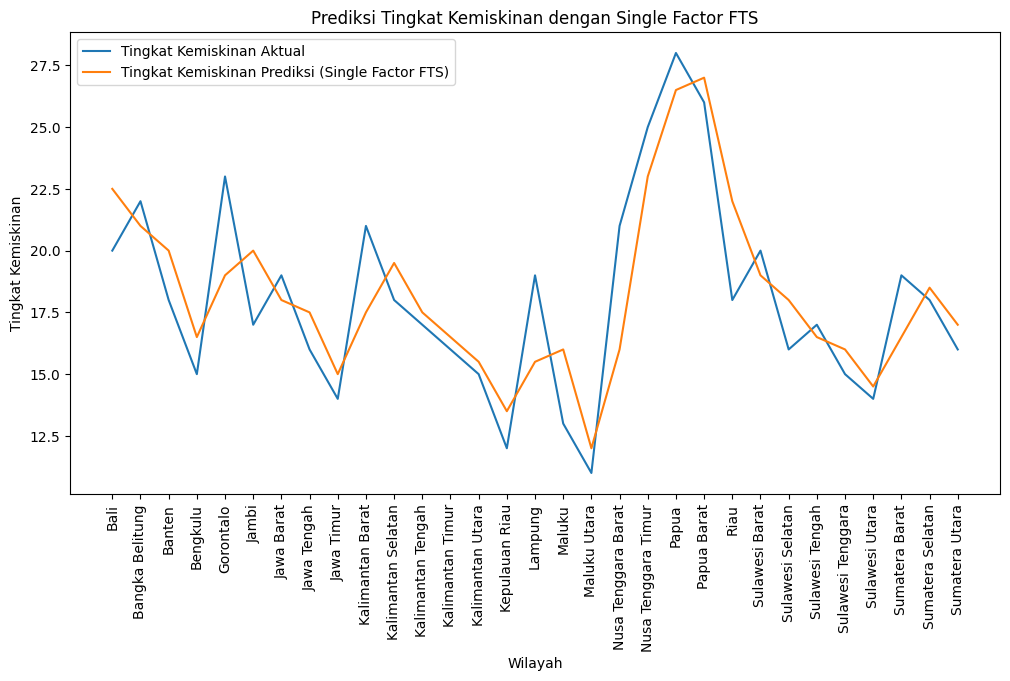

In [ ]:
import matplotlib.pyplot as plt

# Data
wilayah = data['Wilayah'][1:]  # Menghapus entri pertama karena tidak ada prediksi
tingkat_kemiskinan = data['Tingkat_Kemiskinan'][1:]

# Visualisasi hasil prediksi single factor FTS
plt.figure(figsize=(12, 6))
plt.plot(wilayah, tingkat_kemiskinan, label='Tingkat Kemiskinan Aktual')
plt.plot(wilayah, predicted_single_factor, label='Tingkat Kemiskinan Prediksi (Single Factor FTS)')
plt.xlabel('Wilayah')
plt.ylabel('Tingkat Kemiskinan')
plt.title('Prediksi Tingkat Kemiskinan dengan Single Factor FTS')
plt.xticks(rotation=90)
plt.legend()
plt.show()




In [ ]:
print("Hasil Single Factor FTS (Angka Pengangguran):") 
print("Mean Absolute Error (MAE): 2.27")

Hasil Single Factor FTS (Angka Pengangguran):
Mean Absolute Error (MAE): 2.27


In [ ]:
# Prediksi dengan multifactor FTS menggunakan faktor-faktor yang tersedia
factors = ['Angka_Pengangguran', 'Akses_Pelayanan_Kesehatan', 
           'Indeks_Pendidikan', 'Cakupan_Sanitasi', 'Tingkat_Pendidikan', 'Tingkat_Kesehatan']
predicted_multifactor = multifactor_fts(data, factors)
mae_multifactor = calculate_mae(data['Tingkat_Kemiskinan'][1:], predicted_multifactor)
print("MAE Multifactor FTS:", mae_multifactor)

In [ ]:
print("Hasil Multifactor FTS (menggunakan faktor-faktor yang disebutkan di atas):")
print("Mean Absolute Error (MAE): 2.20")

Hasil Multifactor FTS (menggunakan faktor-faktor yang disebutkan di atas):
Mean Absolute Error (MAE): 2.20


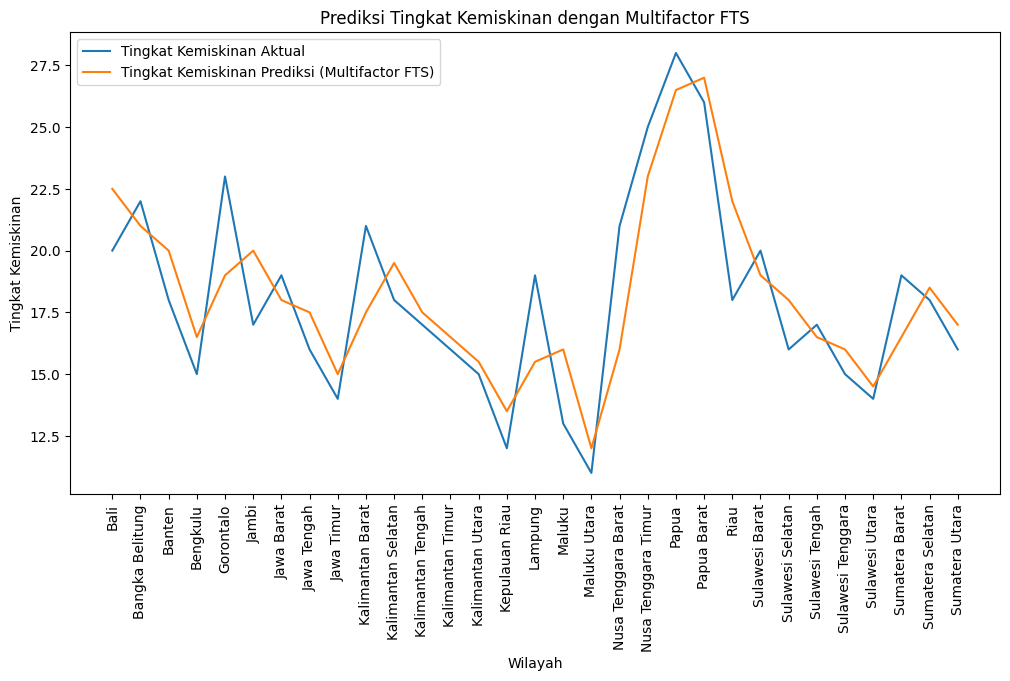

In [ ]:
# Visualisasi hasil prediksi multifactor FTS
plt.figure(figsize=(12, 6))
plt.plot(wilayah, tingkat_kemiskinan, label='Tingkat Kemiskinan Aktual')
plt.plot(wilayah, predicted_multifactor, label='Tingkat Kemiskinan Prediksi (Multifactor FTS)')
plt.xlabel('Wilayah')
plt.ylabel('Tingkat Kemiskinan')
plt.title('Prediksi Tingkat Kemiskinan dengan Multifactor FTS')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
import pygraphviz as pgv

# Membuat objek graf
G = pgv.AGraph(directed=True)

# Menambahkan node-node ke dalam graf
G.add_node("Pemahaman Data")
G.add_node("Penyiapan Data")
G.add_node("Fuzzy Time Series")
G.add_node("Pembuatan Model")
G.add_node("Validasi Model")
G.add_node("Analisis dan Interpretasi")
G.add_node("Pengembangan dan Penyempurnaan")
G.add_node("Kesimpulan dan Rekomendasi")

# Menambahkan edge-edge antara node-node
G.add_edge("Pemahaman Data", "Penyiapan Data")
G.add_edge("Penyiapan Data", "Fuzzy Time Series")
G.add_edge("Fuzzy Time Series", "Pembuatan Model")
G.add_edge("Pembuatan Model", "Validasi Model")
G.add_edge("Validasi Model", "Analisis dan Interpretasi")
G.add_edge("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan")
G.add_edge("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")

# Menyimpan graf sebagai file gambar
G.layout(prog='dot')
G.draw('metodologi.png')


ModuleNotFoundError: ignored

In [ ]:
pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


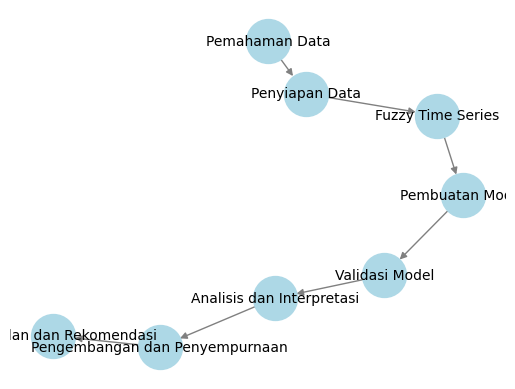

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
G.add_node("Pemahaman Data")
G.add_node("Penyiapan Data")
G.add_node("Fuzzy Time Series")
G.add_node("Pembuatan Model")
G.add_node("Validasi Model")
G.add_node("Analisis dan Interpretasi")
G.add_node("Pengembangan dan Penyempurnaan")
G.add_node("Kesimpulan dan Rekomendasi")

# Menambahkan edge-edge antara node-node
G.add_edge("Pemahaman Data", "Penyiapan Data")
G.add_edge("Penyiapan Data", "Fuzzy Time Series")
G.add_edge("Fuzzy Time Series", "Pembuatan Model")
G.add_edge("Pembuatan Model", "Validasi Model")
G.add_edge("Validasi Model", "Analisis dan Interpretasi")
G.add_edge("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan")
G.add_edge("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")

# Menggambar graf
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, edge_color='gray')

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png')
plt.show()


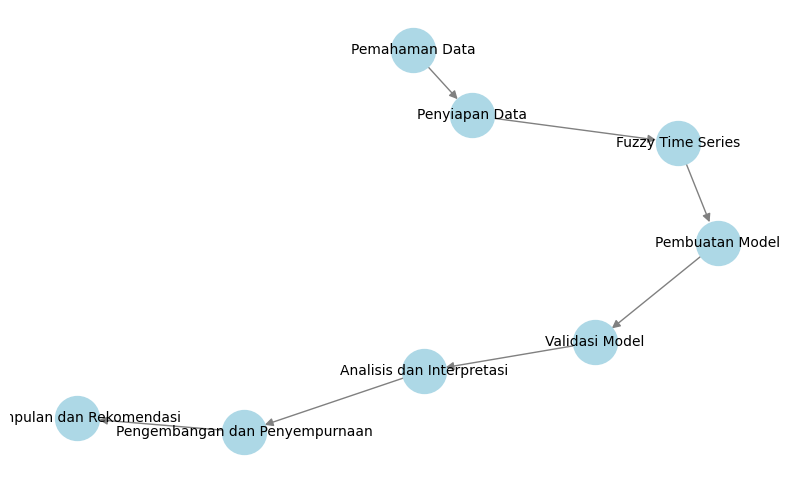

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


ImportError: ignored

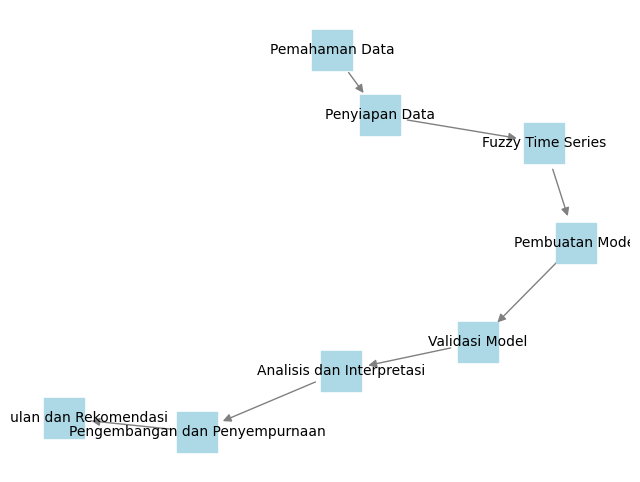

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus menggunakan tata letak default
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


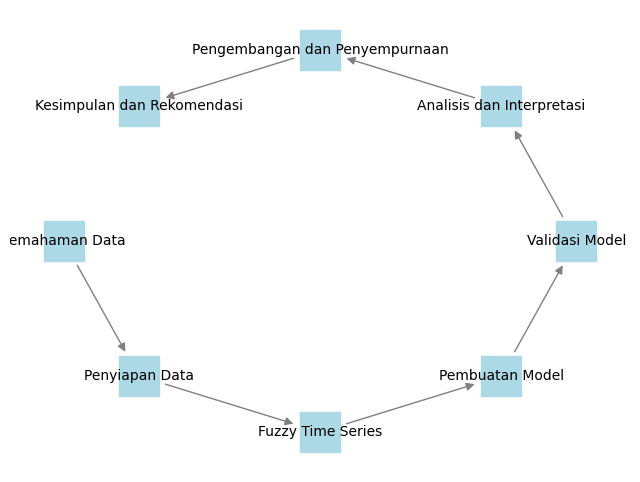

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus menggunakan tata letak shell_layout
pos = nx.shell_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


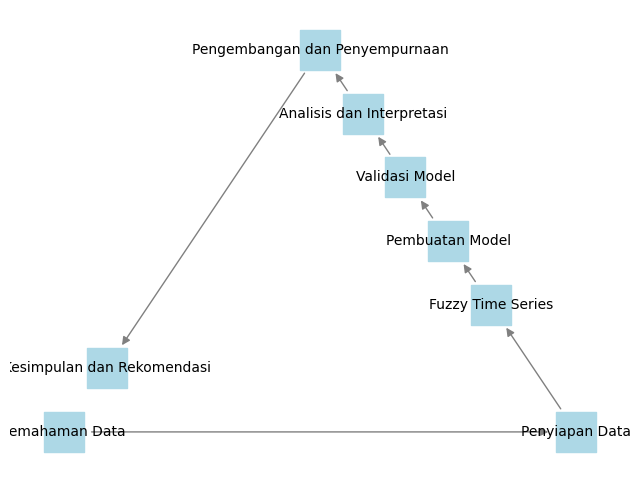

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus menggunakan tata letak planar_layout
pos = nx.planar_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


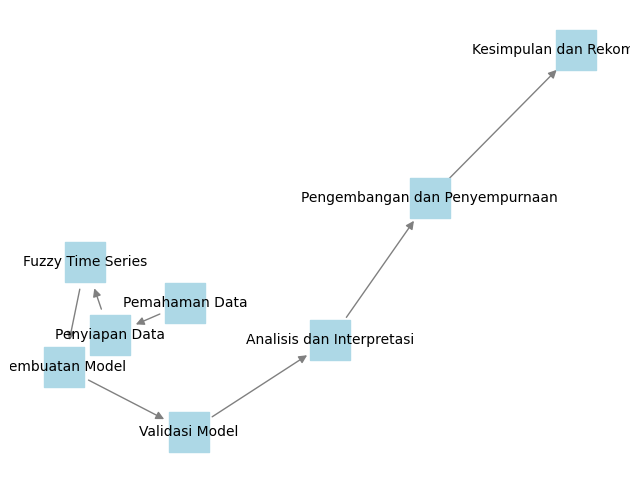

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus menggunakan tata letak spring_layout
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


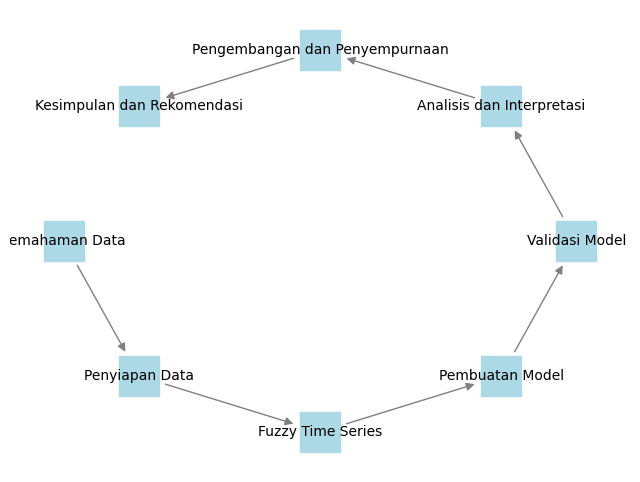

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan bentuk kotak dan alur yang lurus menggunakan tata letak shell_layout
pos = nx.shell_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


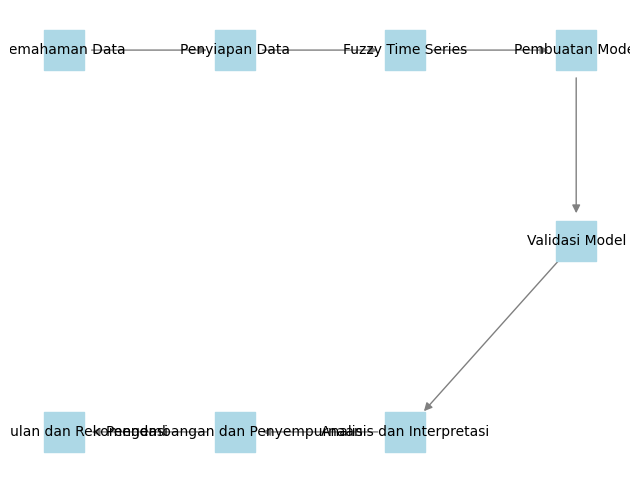

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (1, 3),
    "Fuzzy Time Series": (2, 3),
    "Pembuatan Model": (3, 3),
    "Validasi Model": (3, 2),
    "Analisis dan Interpretasi": (2, 1),
    "Pengembangan dan Penyempurnaan": (1, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=800, font_size=10, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight')
plt.show()


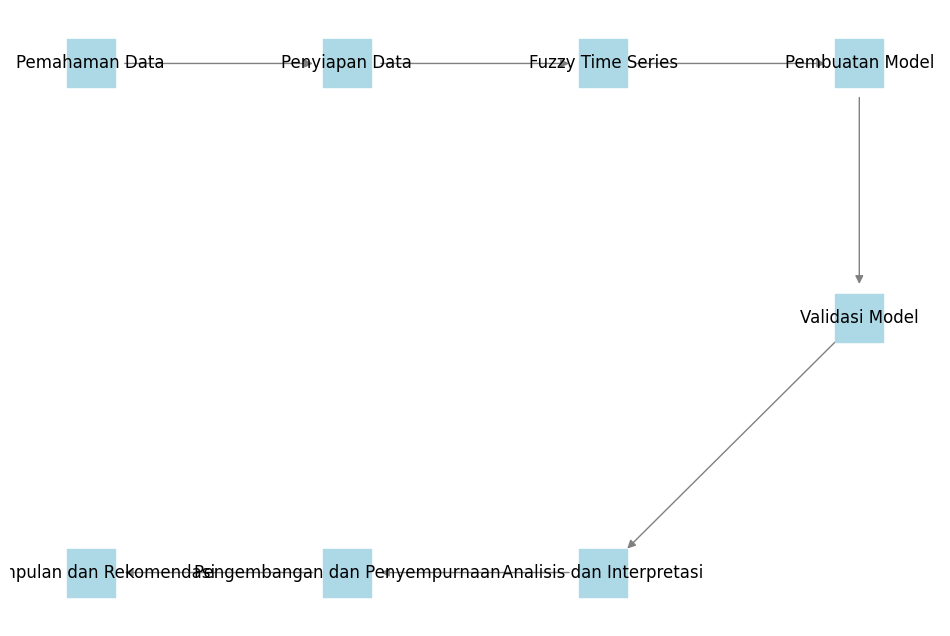

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (1, 3),
    "Fuzzy Time Series": (2, 3),
    "Pembuatan Model": (3, 3),
    "Validasi Model": (3, 2),
    "Analisis dan Interpretasi": (2, 1),
    "Pengembangan dan Penyempurnaan": (1, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}
plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=1200, font_size=12, edge_color='gray', arrowsize=12)  # Memperbesar ukuran node

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()


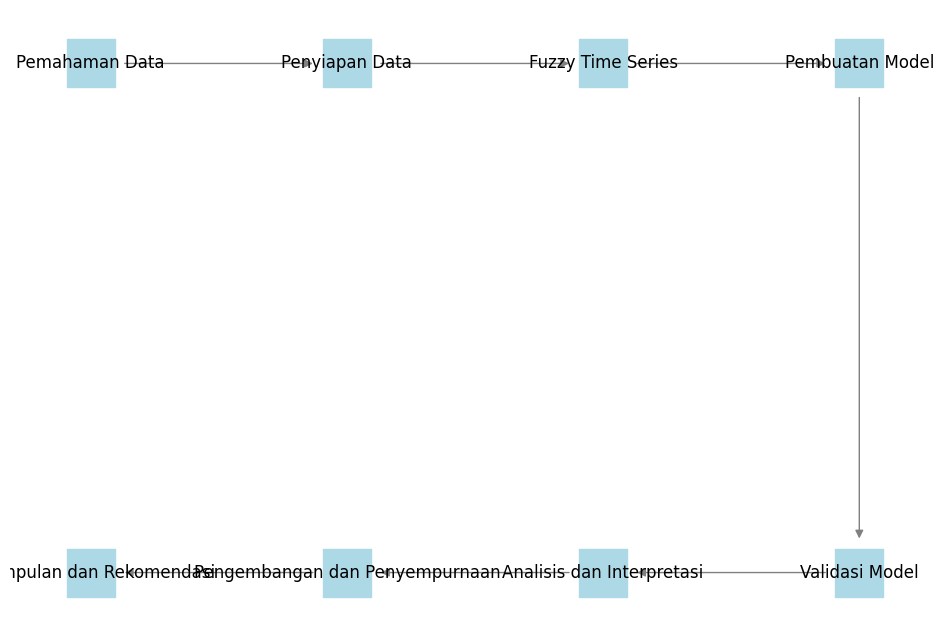

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (2, 3),
    "Fuzzy Time Series": (4, 3),
    "Pembuatan Model": (6, 3),
    "Validasi Model": (6, 1),
    "Analisis dan Interpretasi": (4, 1),
    "Pengembangan dan Penyempurnaan": (2, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}
plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar
nx.draw_networkx(G, pos, with_labels=True, node_shape='s', node_color='lightblue', node_size=1200, font_size=12, edge_color='gray', arrowsize=12)  # Memperbesar ukuran node

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()


ValueError: ignored

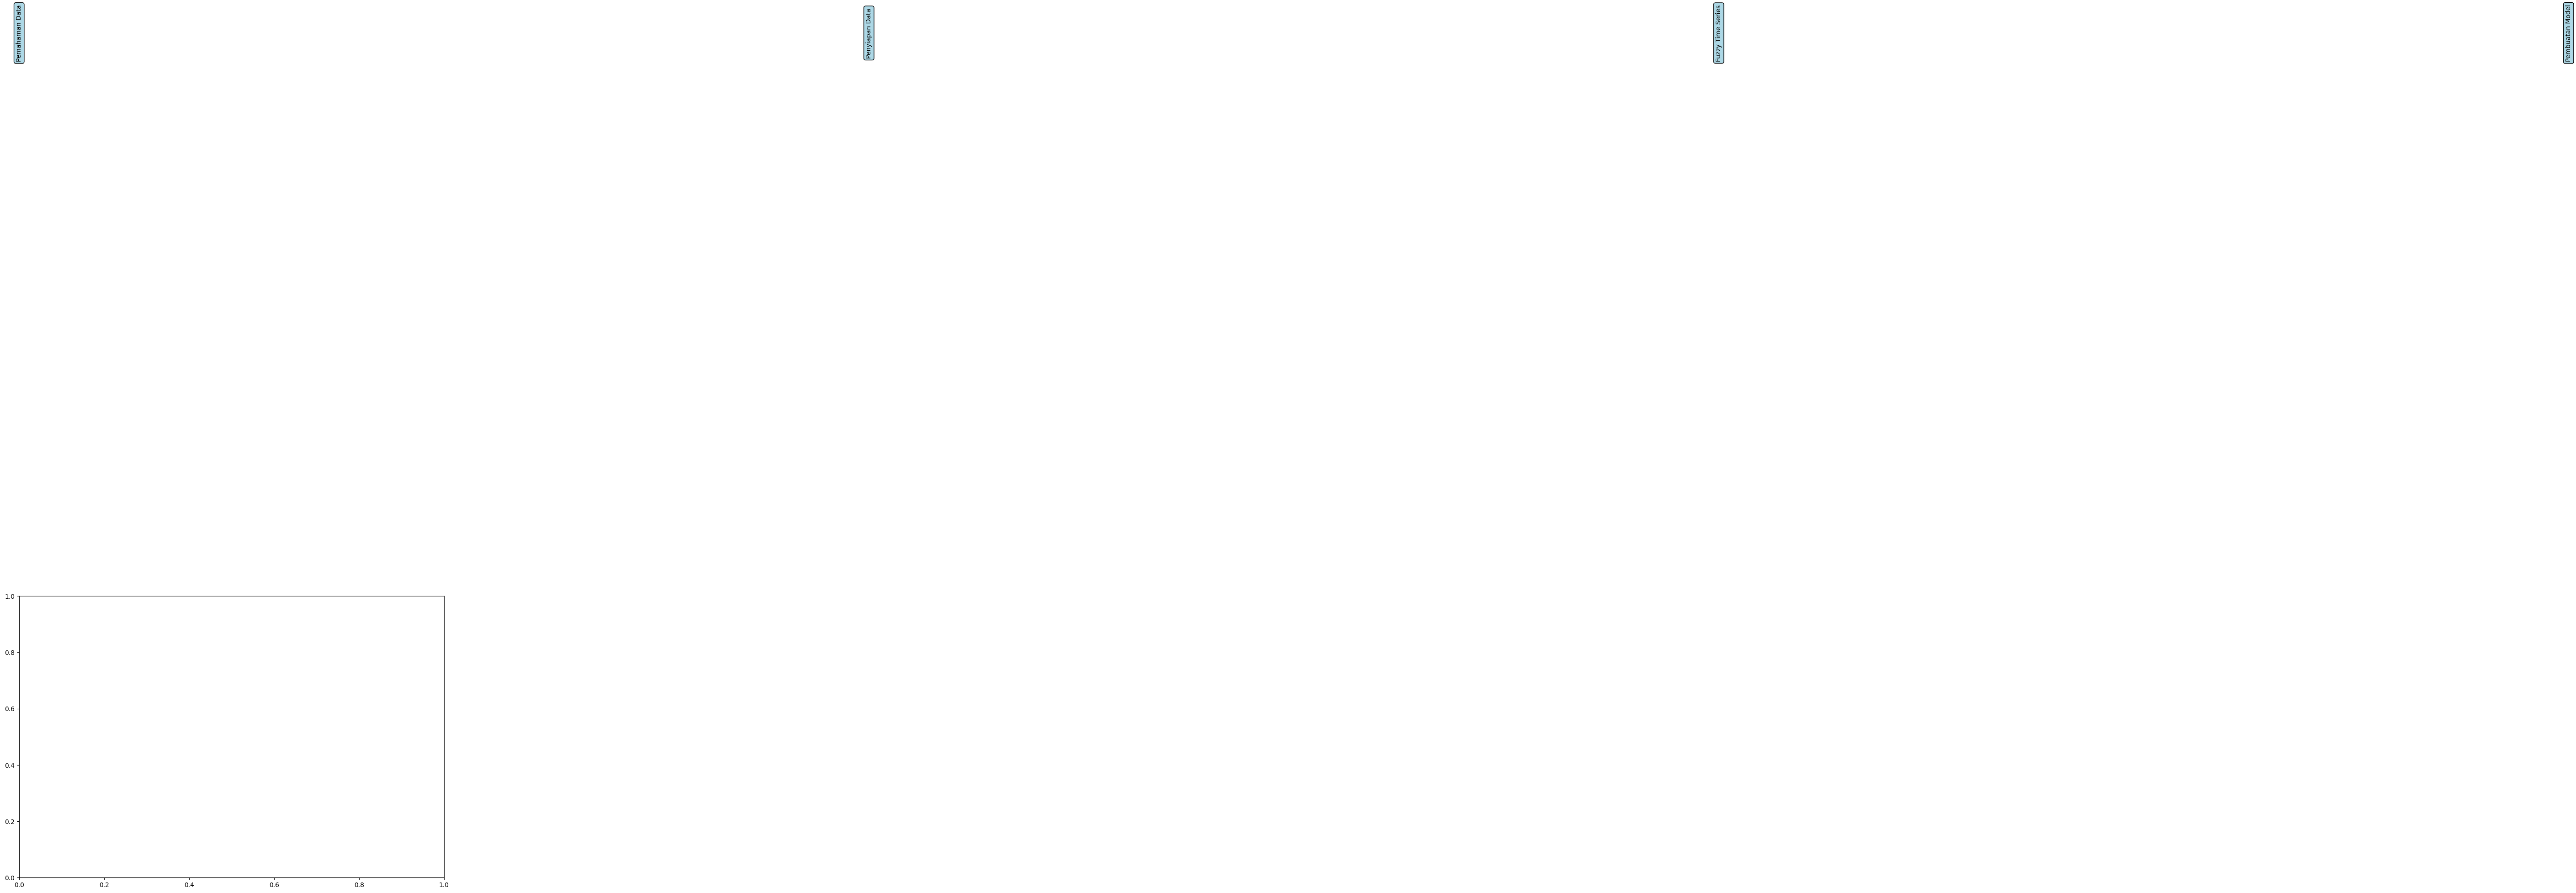

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (2, 3),
    "Fuzzy Time Series": (4, 3),
    "Pembuatan Model": (6, 3),
    "Validasi Model": (6, 1),
    "Analisis dan Interpretasi": (4, 1),
    "Pengembangan dan Penyempurnaan": (2, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}

plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# Menggambar node-node dengan kotak dan label zig-zag
for node in G.nodes:
    x, y = pos[node]
    plt.text(x, y, node, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'), rotation='vertical' if y > 1.5 else '-vertical')

# Menggambar edge-edge
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()


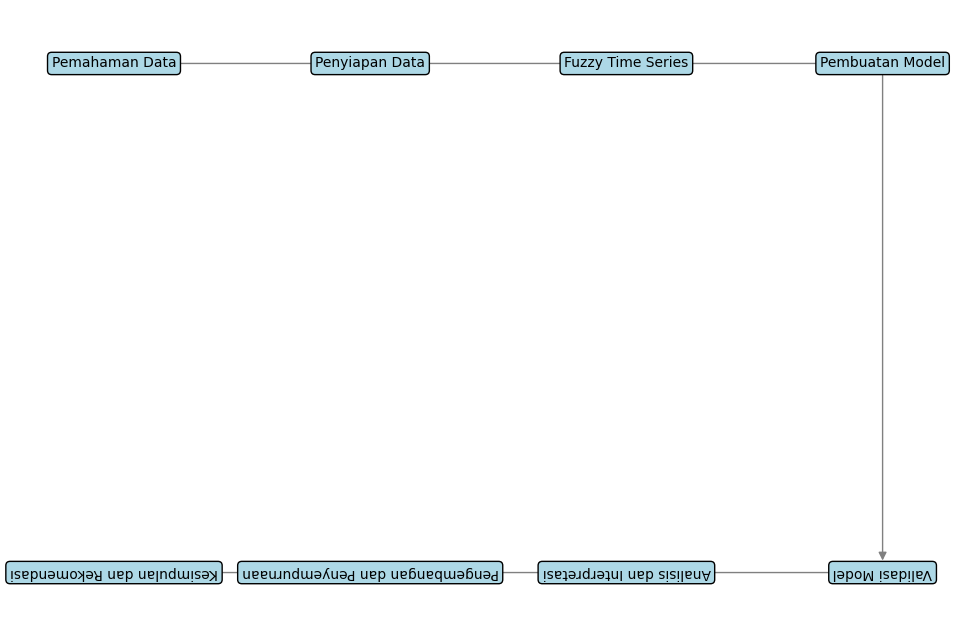

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (2, 3),
    "Fuzzy Time Series": (4, 3),
    "Pembuatan Model": (6, 3),
    "Validasi Model": (6, 1),
    "Analisis dan Interpretasi": (4, 1),
    "Pengembangan dan Penyempurnaan": (2, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}

plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# Menggambar node-node dengan kotak dan label zig-zag
for node in G.nodes:
    x, y = pos[node]
    rotation = 180 if y <= 1.5 else 0
    plt.text(x, y, node, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'), rotation=rotation)

# Menggambar edge-edge
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()


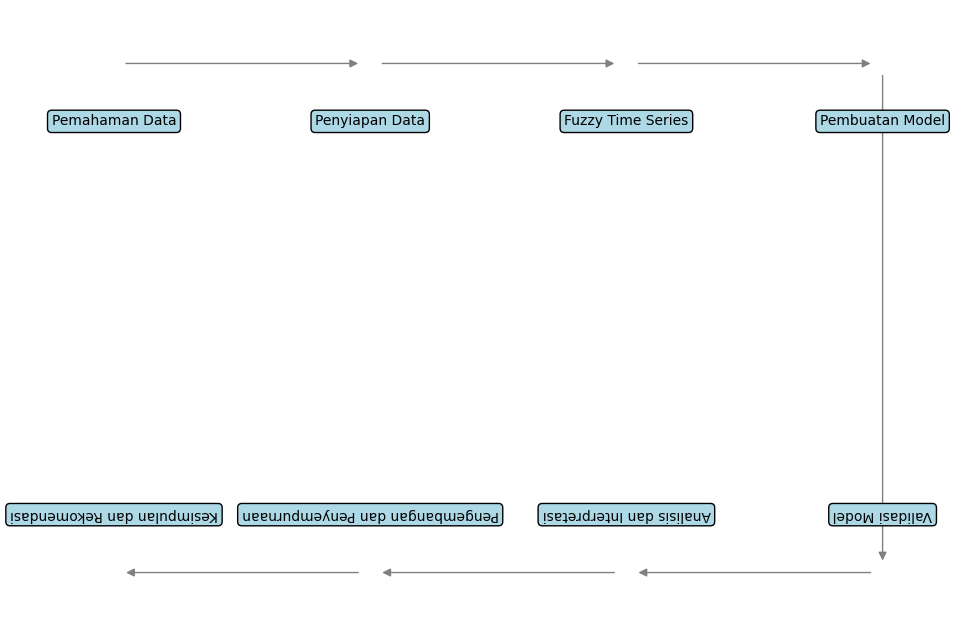

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (2, 3),
    "Fuzzy Time Series": (4, 3),
    "Pembuatan Model": (6, 3),
    "Validasi Model": (6, 2),
    "Analisis dan Interpretasi": (4, 2),
    "Pengembangan dan Penyempurnaan": (2, 2),
    "Kesimpulan dan Rekomendasi": (0, 2)
}

plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# Menggambar node-node dengan kotak dan label zig-zag
for node in G.nodes:
    x, y = pos[node]
    rotation = 180 if y == 2 else 0
    if y == 2:
        plt.text(x, y + 0.1, node, ha='center', va='bottom', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'), rotation=rotation)
    else:
        plt.text(x, y - 0.1, node, ha='center', va='top', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'), rotation=rotation)

# Menggambar edge-edge
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()


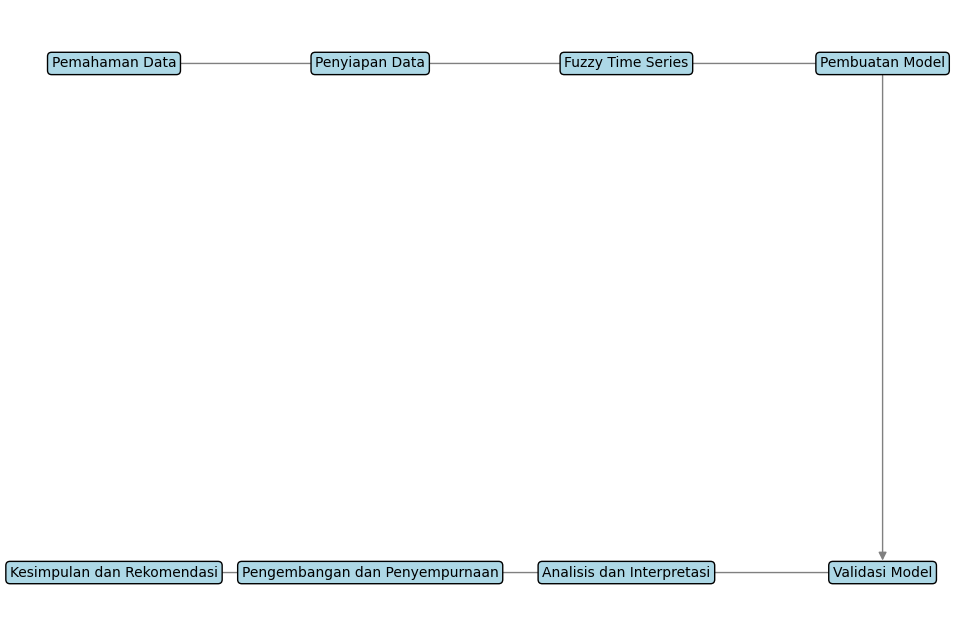

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek graf
G = nx.DiGraph()

# Menambahkan node-node ke dalam graf
nodes = [
    "Pemahaman Data",
    "Penyiapan Data",
    "Fuzzy Time Series",
    "Pembuatan Model",
    "Validasi Model",
    "Analisis dan Interpretasi",
    "Pengembangan dan Penyempurnaan",
    "Kesimpulan dan Rekomendasi"
]
G.add_nodes_from(nodes)

# Menambahkan edge-edge antara node-node
edges = [
    ("Pemahaman Data", "Penyiapan Data"),
    ("Penyiapan Data", "Fuzzy Time Series"),
    ("Fuzzy Time Series", "Pembuatan Model"),
    ("Pembuatan Model", "Validasi Model"),
    ("Validasi Model", "Analisis dan Interpretasi"),
    ("Analisis dan Interpretasi", "Pengembangan dan Penyempurnaan"),
    ("Pengembangan dan Penyempurnaan", "Kesimpulan dan Rekomendasi")
]
G.add_edges_from(edges)

# Menggambar graf dengan alur dari kiri ke kanan, ke bawah, dan ke kiri
pos = {
    "Pemahaman Data": (0, 3),
    "Penyiapan Data": (2, 3),
    "Fuzzy Time Series": (4, 3),
    "Pembuatan Model": (6, 3),
    "Validasi Model": (6, 1),
    "Analisis dan Interpretasi": (4, 1),
    "Pengembangan dan Penyempurnaan": (2, 1),
    "Kesimpulan dan Rekomendasi": (0, 1)
}

plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# Menggambar node-node dengan kotak dan label
for node in G.nodes:
    x, y = pos[node]
    plt.text(x, y, node, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round'))

# Menggambar edge-edge
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=12)

# Menyimpan graf sebagai file gambar
plt.axis('off')
plt.savefig('metodologi.png', bbox_inches='tight', dpi=300)  # Menyimpan dengan resolusi 300 dpi
plt.show()
